In [5]:
import pandas as pd 
import numpy as np
df=pd.read_csv(r"C:\Users\Komal Pandey\Downloads\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
categorical_columns=['Country Code', 'City', 'Locality', 'Locality Verbose', 
                       'Cuisines', 'Currency', 'Has Table booking', 
                       'Has Online delivery', 'Is delivering now', 
                       'Rating color', 'Rating text','Switch to order menu','Restaurant Name']

In [9]:
label_encoder=LabelEncoder()
for column in categorical_columns:
 df[column] = label_encoder.fit_transform(df[column])
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,6,73,"Third Floor, Century City Mall, Kalayaan Avenu...",171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,6,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",593,601,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,6,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,6,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...",862,875,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,6,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",862,875,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229


In [10]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Aggregate rating','Address'])
Y=df['Aggregate rating']
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", Y_train.shape)
print("Testing Target Shape:", Y_test.shape)

Training Features Shape: (7640, 19)
Testing Features Shape: (1911, 19)
Training Target Shape: (7640,)
Testing Target Shape: (1911,)


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [12]:
Y_pred=model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [15]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.2206651189042066
R-squared: 0.4637053304120414


In [45]:
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

                 Feature   Coefficient
12   Has Online delivery  6.760987e-01
15           Price range  4.902912e-01
2           Country Code  1.307317e-01
6              Longitude  2.420431e-03
11     Has Table booking  1.725288e-03
18                 Votes  4.863537e-04
1        Restaurant Name  1.987571e-06
9   Average Cost for two  1.198147e-06
14  Switch to order menu  2.220446e-16
0          Restaurant ID -3.801275e-08
5       Locality Verbose -1.141263e-04
4               Locality -1.911797e-04
8               Cuisines -2.045748e-04
3                   City -2.748875e-03
7               Latitude -4.356637e-03
13     Is delivering now -5.712665e-02
10              Currency -7.515144e-02
16          Rating color -1.947957e-01
17           Rating text -1.998454e-01


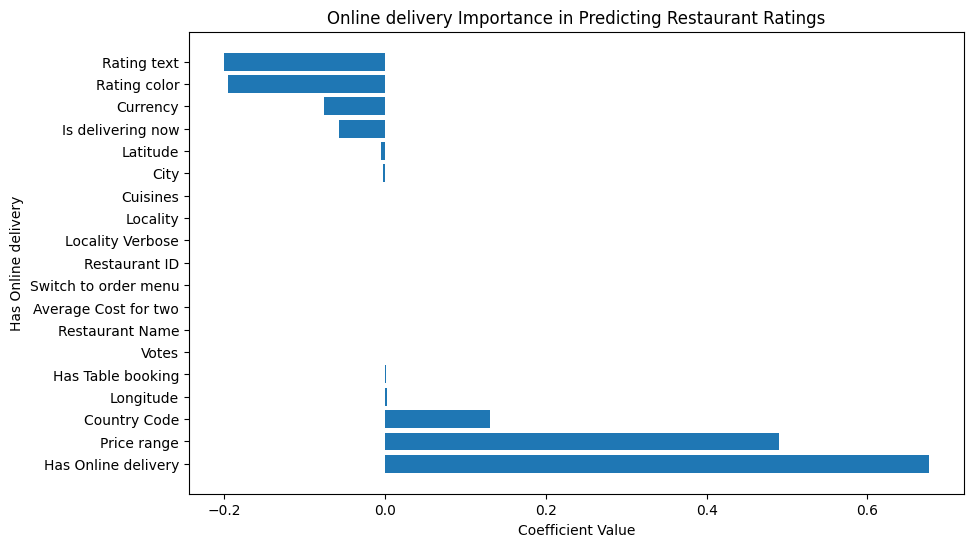

In [46]:
import matplotlib.pyplot as plt

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Has Online delivery')
plt.title('Online delivery Importance in Predicting Restaurant Ratings')
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


                 Feature          VIF
0          Restaurant ID     2.413305
1        Restaurant Name     3.842150
2           Country Code     3.554139
3                   City    10.699306
4               Locality  4970.764435
5       Locality Verbose  4814.753469
6              Longitude    10.974236
7               Latitude     6.984035
8               Cuisines     4.643818
9   Average Cost for two     1.044673
10              Currency    19.164530
11     Has Table booking     1.631795
12   Has Online delivery     1.468017
13     Is delivering now     1.019002
14  Switch to order menu          NaN
15           Price range     7.799931
16          Rating color     5.441784
17           Rating text     2.709260
18                 Votes     1.387695


C:\Users\Komal Pandey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
